In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 KB 2.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import yfinance as yf
import mplfinance as mpf

In [ ]:
start = '2021-01-01'

In [ ]:
data = yf.download('BTC-USD', start=start)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
...,...,...,...,...,...,...
2023-01-08,16954.146484,17091.144531,16924.050781,17091.144531,17091.144531,9768827914
2023-01-09,17093.992188,17389.957031,17093.992188,17196.554688,17196.554688,18624736866
2023-01-10,17192.949219,17484.720703,17162.990234,17446.292969,17446.292969,15808338949


In [ ]:
def get_bbands(df, period):
  df = data.copy()
  df['sma'] = data.Close.rolling(period).mean()
  df['upper'] = data.Close.rolling(period).mean() + (2*data.Close.rolling(period).std())
  df['lower'] = data.Close.rolling(period).mean() - (2*data.Close.rolling(period).std())

  return df

In [ ]:
df = get_bbands(data, 20)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,sma,upper,lower
Date,,,,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN,NaN
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,NaN,NaN,NaN
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,NaN,NaN,NaN
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,NaN,NaN,NaN
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-08,16954.146484,17091.144531,16924.050781,17091.144531,17091.144531,9768827914,16785.721289,17082.103648,16489.338930
2023-01-09,17093.992188,17389.957031,17093.992188,17196.554688,17196.554688,18624736866,16800.233789,17145.817463,16454.650115
2023-01-10,17192.949219,17484.720703,17162.990234,17446.292969,17446.292969,15808338949,16831.671680,17282.310914,16381.032445


In [ ]:
apd = mpf.make_addplot(df[['upper','lower','sma']])

/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


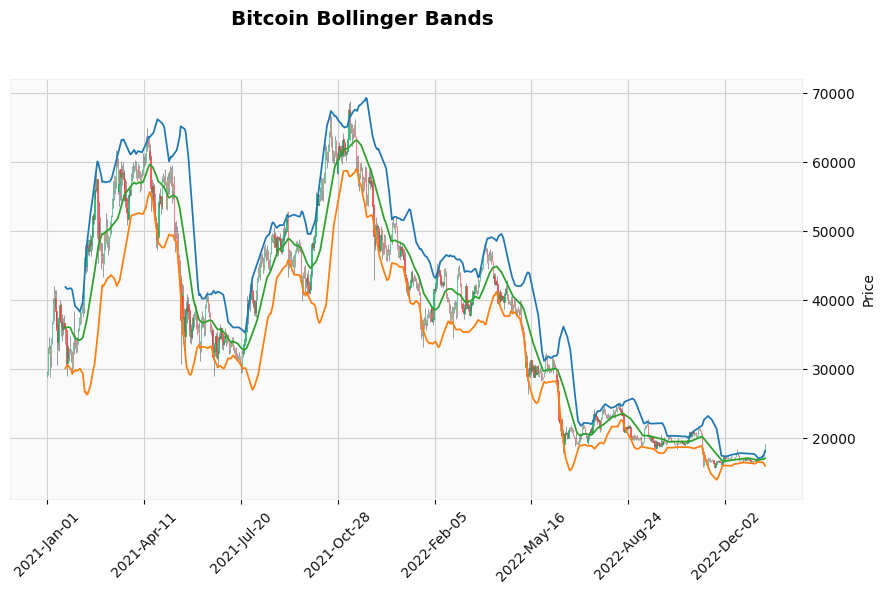

In [ ]:
mpf.plot(df, type='candle', style='yahoo', addplot=apd, title='Bitcoin Bollinger Bands', figsize=(11,6))

In [ ]:
def get_ebbands(data, period):
  df2 = data.copy()
  df2['ema'] = data.Close.ewm(span=period, adjust=False, min_periods=period).mean()
  df2['upper'] = data.Close.ewm(span=period, adjust=False, min_periods=period).mean() + (2*data.Close.ewm(span=period, adjust=False, min_periods=period).std())
  df2['lower'] = data.Close.ewm(span=period, adjust=False, min_periods=period).mean() - (2*data.Close.ewm(span=period, adjust=False, min_periods=period).std())

  return df2

In [ ]:
df2 = get_ebbands(data, 20)

In [ ]:
apd2 = mpf.make_addplot(df2[['upper','lower','ema']])

/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


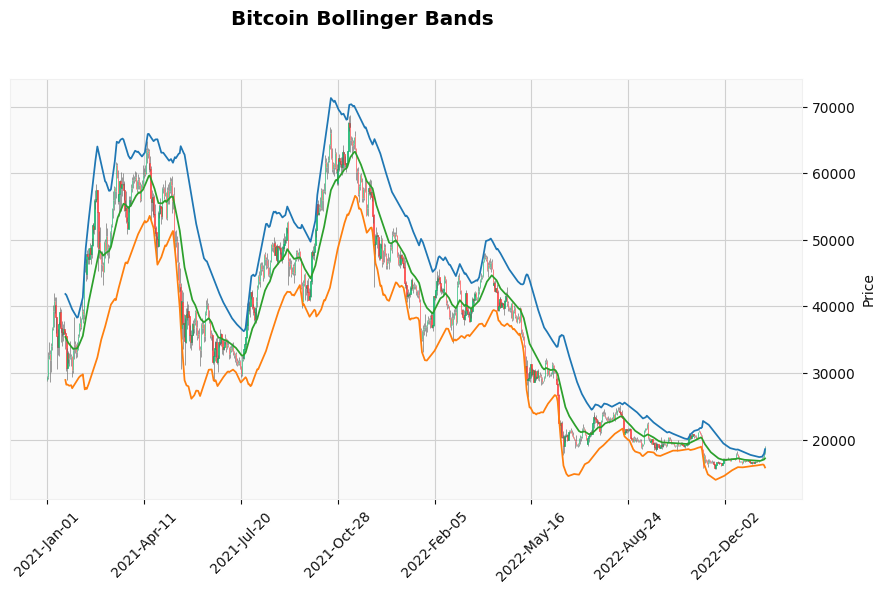

In [ ]:
mpf.plot(df2, type='candle', style='yahoo', addplot=apd2, title='Bitcoin Bollinger Bands', figsize=(11,6))